# COMP5328 - Advanced Machine Learning
## Assignment 1: NMF Algorithms – Code

---

# 1. Import Libraries
- 导入 numpy, scipy, matplotlib
- （如果需要）导入 sklearn 用于评估指标
- 设置随机种子，保证结果可复现

---

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.util import random_noise
from PIL import Image



# 2. Load Datasets
## 2.1 YaleB Dataset
- 加载 ORL 图像数据
- reshape 成矩阵 V
- 归一化 (0-1)

In [3]:
import os
import numpy as np
from PIL import Image

def load_data(root='data/CroppedYaleB', reduce=4):
    """
    Load ORL (or Extended YaleB) dataset to numpy array.

    Args:
        root: path to dataset.
        reduce: scale factor for zooming out images.

    """
    images, labels = [], []

    for i, person in enumerate(sorted(os.listdir(root))):

        if not os.path.isdir(os.path.join(root, person)):
            continue
        # Is the file is dir
        for fname in os.listdir(os.path.join(root, person)):

            # Remove background images in Extended YaleB dataset.
            if fname.endswith('Ambient.pgm'):
                continue
            # the end must be .pgm
            if not fname.endswith('.pgm'):
                continue

            # load image.
            img = Image.open(os.path.join(root, person, fname))
            img = img.convert('L') # grey image.

            # reduce computation complexity.
            # every size are divided by reduce
            img = img.resize([s//reduce for s in img.size])

            # normalize the pixel
            arr = np.asarray(img, dtype=np.float32) / 255.0
            arr = (arr - arr.mean()) / arr.std()

            # convert image to numpy array.
            img = np.asarray(arr).reshape((-1,1))
            # collect data and label.
            images.append(img)
            labels.append(i)
    # concate all images and labels.
    images = np.concatenate(images, axis=1)
    labels = np.array(labels)

    return images, labels

load_data("./data/CroppedYaleB", reduce=4)
images, labels = load_data("./data/CroppedYaleB")
labels

array([ 0,  0,  0, ..., 37, 37, 37])

## 2.2 Load ORL Dataset

In [4]:
def load_data_AR(root='data/CroppedAR', reduce=3):
    """
    Load AR dataset to numpy array.

    Args:
        root: path to AR dataset.
        reduce: scale factor for zooming out images.

    """
    images, labels = [], []

    for fname in os.listdir(root):

        if not fname.endswith('.bmp'):
            continue

        # get label.
        label = int(fname[2:5])
        if fname[0] == 'W': # start from 50
            label += 50

        # load image.
        img = Image.open(os.path.join(root, fname))
        img = img.convert('L') # grey

        # reduce computation complexity.
        img = img.resize([s//reduce for s in img.size])

        # TODO: preprocessing.
        # normalize the pixel, reducing the the influence from light
        arr = np.asarray(img, dtype=np.float32) / 255.0
        arr = (arr - arr.mean()) / arr.std()


        # convert image to numpy array.
        img = np.asarray(img).reshape((-1,1))

        # collect data and label.
        images.append(img)
        labels.append(label)

    # concate all images and labels.
    images = np.concatenate(images, axis=1)
    labels = np.array(labels)

    return images, labels


# 3. Noise Generation
## 3.1 Salt & Pepper Noise

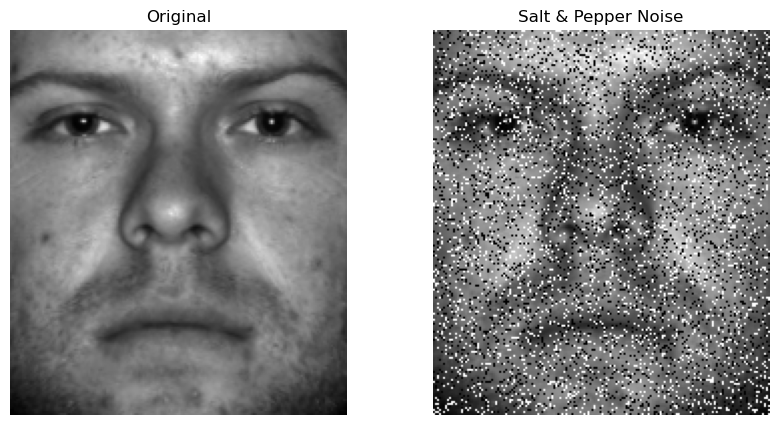

In [14]:
# Adding salt and pepper noise
def aad_salt_pepper_noise(img, p = 0.1, r = 0.5):
    noisy_img = img.copy()
    height, weight = img.shape
    pixels_cnt = height * weight
    # the count of noisy
    noisy_cnt = int(p * pixels_cnt)

    # choosing the pixels randomly
    coordinates = np.random.choice(pixels_cnt, size=noisy_cnt, replace=False)

    salt_cnt = int(r * noisy_cnt)
    salt_idx = coordinates[:salt_cnt]
    noisy_img.reshape(-1)[salt_idx] = noisy_img.max() if noisy_img.max() > 1 else 1.0

    pepper_cnt = coordinates[salt_cnt:]
    noisy_img.reshape(-1)[pepper_cnt] = noisy_img.min()

    return noisy_img

img_path = "./data/CroppedYaleB/yaleB01/yaleB01_P00A+000E+00.pgm"
img = Image.open(img_path).convert('L')
img_np = np.array(img)

noisy_img = aad_salt_pepper_noise(img_np, 0.2, 0.5)

# visualization
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(img, cmap='gray')
plt.title("Original")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(noisy_img, cmap='gray')
plt.title("Salt & Pepper Noise")
plt.axis("off")

plt.show()


## 3.2 Custom Noise



# 4. NMF Algorithms Implementation (Core)
## 4.1 Standard NMF (Baseline)
- 目标函数：L2 范数
- 优化方法：乘法更新规则 (MU) 或交替最小二乘 (ALS)
- 函数：`nmf_standard(V, rank, max_iter)`

In [ ]:
# The standard NMF algorithm


## 4.2 Robust NMF (L1 / L2,1 Variant)
- 目标函数：L1 或 L2,1 范数
- 优化方法：子梯度 / 加权更新
- 函数：`nmf_robust(V, rank, max_iter)`

---


# 5. Evaluation Metrics
## 5.1 Relative Reconstruction Error (RRE)
- 函数：`compute_rre(V_clean, W, H)`

## 5.2 Accuracy (Optional)
- 使用 KMeans 聚类
- 计算聚类标签 vs 真实标签
- 函数：`compute_accuracy(Y_true, Y_pred)`

## 5.3 Normalized Mutual Information (Optional)
- 使用 sklearn.metrics
- 函数：`compute_nmi(Y_true, Y_pred)`

---


# 6. Experiments
## 6.1 Run NMF on ORL Dataset
- 在 ORL 数据集上分别跑标准 NMF 和鲁棒 NMF
- 保存结果

## 6.2 Run NMF on YaleB Dataset
- 在 YaleB 数据集上分别跑标准 NMF 和鲁棒 NMF
- 保存结果

## 6.3 Run with Different Noise Levels (p, r)
- 实验参数：p = 0.2, 0.4, 0.6; r = 0.3, 0.7
- 循环运行，重复 5 次取均值和标准差
- 存储结果为表格

---


# 7. Results
## 7.1 Visualization of Original vs Noisy Images
- 绘制原始图像 + 噪声图像对比

## 7.2 Reconstruction Examples
- 展示重构前后图像（标准 NMF vs 鲁棒 NMF）

## 7.3 Quantitative Results (Tables & Graphs)
- RRE 对比表格
- Accuracy/NMI 曲线
- 不同噪声水平下的对比柱状图